<a href="https://colab.research.google.com/github/parth-mango/EVA5-Assignments/blob/main/EVA%20S9/EVA_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -U albumentations

In [2]:
# !rm *.py.1
# !rm *.py

In [3]:
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S9/album_transform.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S9/dataloaders.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S9/grad_cam.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S9/misc.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S9/model.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S9/reg_tech.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S9/resnet.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S9/testing.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S9/training.py

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

In [5]:
from resnet import ResNet18
import training
import reg_tech
import testing
import dataloaders

In [6]:
net= ResNet18()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [7]:
train_losses = []
test_losses = []

In [8]:
from album_transform import train_transform, test_transform

batch_size = 128
train_loader, test_loader, sample_loader = dataloaders.data_loaders(
                                                batch_size,
                                                train_transform,
                                                test_transform
                                                )

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


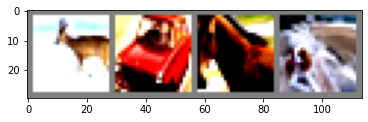

In [9]:
import misc
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

misc.show_images(sample_loader, classes)

In [10]:
optimizer = reg_tech.hi_optimizer(model)

In [11]:
for epoch in range(1, 70):
    training.train(model, device, train_loader, optimizer, epoch)
    test_loss = testing.test(model, device, test_loader)
    print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))

Loss=1.3582475185394287 Batch_id=390 Accuracy=37.20: 100%|██████████| 391/391 [00:42<00:00,  9.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 4631/10000 (46.31%)

Epoch-1 lr: 0.001


Loss=1.2773408889770508 Batch_id=390 Accuracy=51.65: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0102, Accuracy: 5312/10000 (53.12%)

Epoch-2 lr: 0.001


Loss=0.9465109705924988 Batch_id=390 Accuracy=58.78: 100%|██████████| 391/391 [00:41<00:00,  9.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6207/10000 (62.07%)

Epoch-3 lr: 0.001


Loss=0.9608465433120728 Batch_id=390 Accuracy=62.98: 100%|██████████| 391/391 [00:40<00:00,  9.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6243/10000 (62.43%)

Epoch-4 lr: 0.001


Loss=0.9262967109680176 Batch_id=390 Accuracy=65.98: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6806/10000 (68.06%)

Epoch-5 lr: 0.001


Loss=0.9016720056533813 Batch_id=390 Accuracy=68.39: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6812/10000 (68.12%)

Epoch-6 lr: 0.001


Loss=0.7061799764633179 Batch_id=390 Accuracy=70.65: 100%|██████████| 391/391 [00:41<00:00,  9.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7064/10000 (70.64%)

Epoch-7 lr: 0.001


Loss=0.8552687764167786 Batch_id=390 Accuracy=72.36: 100%|██████████| 391/391 [00:41<00:00,  9.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6804/10000 (68.04%)

Epoch-8 lr: 0.001


Loss=0.8980402946472168 Batch_id=390 Accuracy=74.18: 100%|██████████| 391/391 [00:41<00:00,  9.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7385/10000 (73.85%)

Epoch-9 lr: 0.001


Loss=0.8971153497695923 Batch_id=390 Accuracy=75.61: 100%|██████████| 391/391 [00:41<00:00,  9.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7601/10000 (76.01%)

Epoch-10 lr: 0.001


Loss=1.0334579944610596 Batch_id=390 Accuracy=76.87: 100%|██████████| 391/391 [00:41<00:00,  9.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7459/10000 (74.59%)

Epoch-11 lr: 0.001


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7823/10000 (78.23%)

Epoch-12 lr: 0.001


Loss=0.5043115615844727 Batch_id=390 Accuracy=78.82: 100%|██████████| 391/391 [00:41<00:00,  9.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7899/10000 (78.99%)

Epoch-13 lr: 0.001


Loss=0.5266350507736206 Batch_id=390 Accuracy=79.65: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7604/10000 (76.04%)

Epoch-14 lr: 0.001


Loss=0.4300076961517334 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7451/10000 (74.51%)

Epoch-15 lr: 0.001


Loss=0.46506771445274353 Batch_id=390 Accuracy=80.67: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8071/10000 (80.71%)

Epoch-16 lr: 0.001


Loss=0.52231365442276 Batch_id=390 Accuracy=81.49: 100%|██████████| 391/391 [00:41<00:00,  9.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7802/10000 (78.02%)

Epoch-17 lr: 0.001


Loss=0.4557102620601654 Batch_id=390 Accuracy=82.27: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7834/10000 (78.34%)

Epoch-18 lr: 0.001


Loss=0.6729468703269958 Batch_id=390 Accuracy=82.64: 100%|██████████| 391/391 [00:41<00:00,  9.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8140/10000 (81.40%)

Epoch-19 lr: 0.001


Loss=0.4139217734336853 Batch_id=390 Accuracy=83.20: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8100/10000 (81.00%)

Epoch-20 lr: 0.001


Loss=0.2854117751121521 Batch_id=390 Accuracy=83.79: 100%|██████████| 391/391 [00:41<00:00,  9.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8312/10000 (83.12%)

Epoch-21 lr: 0.001


Loss=0.6392136812210083 Batch_id=390 Accuracy=84.17: 100%|██████████| 391/391 [00:41<00:00,  9.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8257/10000 (82.57%)

Epoch-22 lr: 0.001


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8172/10000 (81.72%)

Epoch-23 lr: 0.001


Loss=0.4932591915130615 Batch_id=390 Accuracy=84.90: 100%|██████████| 391/391 [00:41<00:00,  9.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8389/10000 (83.89%)

Epoch-24 lr: 0.001


Loss=0.3398107886314392 Batch_id=390 Accuracy=85.51: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8149/10000 (81.49%)

Epoch-25 lr: 0.001


Loss=0.4103803038597107 Batch_id=390 Accuracy=85.80: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8238/10000 (82.38%)

Epoch-26 lr: 0.001


Loss=0.3866589665412903 Batch_id=390 Accuracy=86.03: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8501/10000 (85.01%)

Epoch-27 lr: 0.001


Loss=0.42313307523727417 Batch_id=390 Accuracy=86.35: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8323/10000 (83.23%)

Epoch-28 lr: 0.001


Loss=0.26999497413635254 Batch_id=390 Accuracy=86.76: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8190/10000 (81.90%)

Epoch-29 lr: 0.001


Loss=0.4038279950618744 Batch_id=390 Accuracy=86.96: 100%|██████████| 391/391 [00:41<00:00,  9.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8252/10000 (82.52%)

Epoch-30 lr: 0.001


Loss=0.3083788752555847 Batch_id=390 Accuracy=87.26: 100%|██████████| 391/391 [00:41<00:00,  9.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8577/10000 (85.77%)

Epoch-31 lr: 0.001


Loss=0.34160667657852173 Batch_id=390 Accuracy=87.53: 100%|██████████| 391/391 [00:41<00:00,  9.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8469/10000 (84.69%)

Epoch-32 lr: 0.001


Loss=0.310724675655365 Batch_id=390 Accuracy=87.91: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8406/10000 (84.06%)

Epoch-33 lr: 0.001


Loss=0.31403395533561707 Batch_id=390 Accuracy=88.21: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8485/10000 (84.85%)

Epoch-34 lr: 0.001


Loss=0.3835095465183258 Batch_id=390 Accuracy=88.57: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8495/10000 (84.95%)

Epoch-35 lr: 0.001


Loss=0.3994101583957672 Batch_id=390 Accuracy=88.51: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8405/10000 (84.05%)

Epoch-36 lr: 0.001


Loss=0.2608534097671509 Batch_id=390 Accuracy=88.70: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8502/10000 (85.02%)

Epoch-37 lr: 0.001


Loss=0.19584804773330688 Batch_id=390 Accuracy=89.02: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8581/10000 (85.81%)

Epoch-38 lr: 0.001


Loss=0.3259148597717285 Batch_id=390 Accuracy=89.28: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8656/10000 (86.56%)

Epoch-39 lr: 0.001


Loss=0.28904861211776733 Batch_id=390 Accuracy=89.52: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8541/10000 (85.41%)

Epoch-40 lr: 0.001


Loss=0.25203055143356323 Batch_id=390 Accuracy=89.28: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8557/10000 (85.57%)

Epoch-41 lr: 0.001


Loss=0.19166871905326843 Batch_id=390 Accuracy=89.83: 100%|██████████| 391/391 [00:41<00:00,  9.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8567/10000 (85.67%)

Epoch-42 lr: 0.001


Loss=0.15739378333091736 Batch_id=390 Accuracy=90.14: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8655/10000 (86.55%)

Epoch-43 lr: 0.001


Loss=0.37935110926628113 Batch_id=390 Accuracy=90.26: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8328/10000 (83.28%)

Epoch-44 lr: 0.001


Loss=0.2369196116924286 Batch_id=390 Accuracy=90.24: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8684/10000 (86.84%)

Epoch-45 lr: 0.001


Loss=0.20890924334526062 Batch_id=390 Accuracy=90.53: 100%|██████████| 391/391 [00:41<00:00,  9.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8597/10000 (85.97%)

Epoch-46 lr: 0.001


Loss=0.3829641342163086 Batch_id=390 Accuracy=90.77: 100%|██████████| 391/391 [00:41<00:00,  9.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8624/10000 (86.24%)

Epoch-47 lr: 0.001


Loss=0.3542225956916809 Batch_id=390 Accuracy=90.80: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8672/10000 (86.72%)

Epoch-48 lr: 0.001


Loss=0.1854066699743271 Batch_id=390 Accuracy=91.14: 100%|██████████| 391/391 [00:41<00:00,  9.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8607/10000 (86.07%)

Epoch-49 lr: 0.001


Loss=0.30045583844184875 Batch_id=390 Accuracy=91.20: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8789/10000 (87.89%)

Epoch-50 lr: 0.001


Loss=0.1969609260559082 Batch_id=390 Accuracy=91.42: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8483/10000 (84.83%)

Epoch-51 lr: 0.001


Loss=0.3156173527240753 Batch_id=390 Accuracy=91.47: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8723/10000 (87.23%)

Epoch-52 lr: 0.001


Loss=0.12683987617492676 Batch_id=390 Accuracy=91.63: 100%|██████████| 391/391 [00:41<00:00,  9.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8615/10000 (86.15%)

Epoch-53 lr: 0.001


Loss=0.19810274243354797 Batch_id=390 Accuracy=91.86: 100%|██████████| 391/391 [00:41<00:00,  9.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8652/10000 (86.52%)

Epoch-54 lr: 0.001


Loss=0.13555680215358734 Batch_id=390 Accuracy=91.87: 100%|██████████| 391/391 [00:41<00:00,  9.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8607/10000 (86.07%)

Epoch-55 lr: 0.001


Loss=0.1368916779756546 Batch_id=390 Accuracy=92.33: 100%|██████████| 391/391 [00:41<00:00,  9.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8842/10000 (88.42%)

Epoch-56 lr: 0.001


Loss=0.23991835117340088 Batch_id=390 Accuracy=92.06: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8767/10000 (87.67%)

Epoch-57 lr: 0.001


Loss=0.16211839020252228 Batch_id=390 Accuracy=92.30: 100%|██████████| 391/391 [00:41<00:00,  9.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8786/10000 (87.86%)

Epoch-58 lr: 0.001


Loss=0.17157623171806335 Batch_id=390 Accuracy=92.49: 100%|██████████| 391/391 [00:41<00:00,  9.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8680/10000 (86.80%)

Epoch-59 lr: 0.001


Loss=0.19713690876960754 Batch_id=390 Accuracy=92.28: 100%|██████████| 391/391 [00:41<00:00,  9.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8694/10000 (86.94%)

Epoch-60 lr: 0.001


Loss=0.12209391593933105 Batch_id=390 Accuracy=92.73: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8858/10000 (88.58%)

Epoch-61 lr: 0.001


Loss=0.22956332564353943 Batch_id=390 Accuracy=92.79: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8715/10000 (87.15%)

Epoch-62 lr: 0.001


Loss=0.1345319151878357 Batch_id=390 Accuracy=92.92: 100%|██████████| 391/391 [00:41<00:00,  9.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8722/10000 (87.22%)

Epoch-63 lr: 0.001


Loss=0.11433635652065277 Batch_id=390 Accuracy=93.01: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8617/10000 (86.17%)

Epoch-64 lr: 0.001


Loss=0.15308590233325958 Batch_id=390 Accuracy=93.10: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8652/10000 (86.52%)

Epoch-65 lr: 0.001


Loss=0.21871086955070496 Batch_id=390 Accuracy=93.22: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8637/10000 (86.37%)

Epoch-66 lr: 0.001


Loss=0.17487408220767975 Batch_id=390 Accuracy=93.33: 100%|██████████| 391/391 [00:41<00:00,  9.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8820/10000 (88.20%)

Epoch-67 lr: 0.001


Loss=0.23219680786132812 Batch_id=390 Accuracy=93.36: 100%|██████████| 391/391 [00:41<00:00,  9.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8770/10000 (87.70%)

Epoch-68 lr: 0.001


Loss=0.33348676562309265 Batch_id=390 Accuracy=93.39: 100%|██████████| 391/391 [00:41<00:00,  9.44it/s]



Test set: Average loss: 0.0029, Accuracy: 8914/10000 (89.14%)

Epoch-69 lr: 0.001


In [12]:
# !wget https://www.daws.org/wp-content/uploads/2014/07/Shepherd-Dog-Tabby-Cat-square-300x300.png

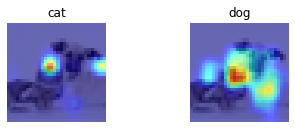

In [13]:
from grad_cam import run_gradcam
import matplotlib.pyplot as plt

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for x, name in enumerate(['cat', 'dog']):
    image, label = run_gradcam(
        model, 
        'Shepherd-Dog-Tabby-Cat-square-300x300.png', 
        class_names.index(name)
        )
    
    plt.subplot(2,2,x+1)
    plt.title(name)
    plt.axis('off')
    plt.imshow(image)